<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [1]:
# YOUR CODE HERE
import pandas as pd 
import numpy as np

past = pd.read_csv('../dat/past.csv.gz')

past.columns

Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')

In [2]:
past.describe()

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.573727e+06,5.235286e+08,1.951080,1.327052,2.490234e+05,7.457600,7.426321,0.541953,0.893687,0.413592,...,0.169931,0.213311,0.065900,0.162676,0.244012,0.169207,0.085550,0.343800,0.059343,1.143728
std,1.161840e+06,5.998702e+07,1.324727,0.718266,6.920382e+05,11.883206,11.876266,0.565350,0.841036,0.772170,...,0.255599,0.275556,0.172911,0.246050,0.289270,0.252342,0.191101,0.475023,0.153912,0.438141
min,4.104000e+03,6.524181e+07,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.760491e+06,4.998498e+08,1.000000,1.000000,0.000000e+00,2.483750,2.480000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5.830816e+06,5.343735e+08,1.750000,1.166667,3.626375e+03,4.440585,4.440000,0.500000,1.000000,0.222222,...,0.000000,0.142857,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.875312e+06,5.616843e+08,2.308355,1.500000,2.071993e+05,7.620000,7.550000,0.858766,1.000000,0.632775,...,0.250000,0.333333,0.040000,0.250000,0.363636,0.250000,0.090909,1.000000,0.041888,1.045996
max,5.932538e+06,6.220262e+08,40.000000,28.000000,1.087537e+07,236.510000,236.510000,12.000000,28.000000,38.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [3]:
past.head(5)

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
0,5866936,5.618978e+08,1.333333,1.333333,5550.000,15.84000,15.84000,0.00,1.333333,0.00,...,0.00,0.000,0.0,0.666667,0.333333,0.00,0.00,0,0.00,1.0
1,5647110,5.326529e+08,2.250000,1.500000,27556.500,5.80000,5.56500,1.25,0.250000,0.25,...,0.25,0.750,0.0,0.000000,0.250000,0.00,0.00,0,0.00,1.0
2,5790472,4.578109e+08,1.000000,1.000000,0.000,6.27250,6.27250,0.25,0.750000,0.00,...,0.00,0.000,0.0,0.000000,0.750000,0.25,0.00,0,0.00,1.0
3,5811598,4.612641e+08,1.500000,1.500000,131532.500,5.56000,5.56000,0.25,1.000000,0.25,...,0.25,0.000,0.0,0.000000,0.500000,0.00,0.25,0,0.25,1.0
4,5846363,5.157993e+08,1.875000,1.375000,11055.875,4.08625,4.08625,0.50,1.000000,0.25,...,0.25,0.375,0.0,0.125000,0.250000,0.25,0.00,1,0.00,1.0


<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

In [4]:
# YOUR CODE HERE
past[['Purchased?']].value_counts()

Purchased?
0             3281
1             1719
dtype: int64

In [5]:
percent = past[['Purchased?']].value_counts()[1]/sum([past['Purchased?'].value_counts()[0], past['Purchased?'].value_counts()[1]])
print(f"{percent:.02%}")

34.38%


Answer: 34%

3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [6]:
# YOUR CODE HERE
#y = past['Purchased?']
#X = past.drop(columns=['product_id', 'user_id', 'Purchased?'])
X = past.drop(columns=['product_id', 'user_id'], axis=1)
# YOUR CODE HERE
X.head(5)

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,InsessionCart,InsessionView,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
0,1.333333,1.333333,5550.000,15.84000,15.84000,0.00,1.333333,0.00,0.000,1.000,...,0.00,0.000,0.0,0.666667,0.333333,0.00,0.00,0,0.00,1.0
1,2.250000,1.500000,27556.500,5.80000,5.56500,1.25,0.250000,0.25,3.750,2.250,...,0.25,0.750,0.0,0.000000,0.250000,0.00,0.00,0,0.00,1.0
2,1.000000,1.000000,0.000,6.27250,6.27250,0.25,0.750000,0.00,17.250,30.000,...,0.00,0.000,0.0,0.000000,0.750000,0.25,0.00,0,0.00,1.0
3,1.500000,1.500000,131532.500,5.56000,5.56000,0.25,1.000000,0.25,3.250,10.500,...,0.25,0.000,0.0,0.000000,0.500000,0.00,0.25,0,0.25,1.0
4,1.875000,1.375000,11055.875,4.08625,4.08625,0.50,1.000000,0.25,4.875,3.375,...,0.25,0.375,0.0,0.125000,0.250000,0.25,0.00,1,0.00,1.0


In [7]:
y = X.pop('Purchased?')
y.head(5)

0    0
1    0
2    0
3    0
4    1
Name: Purchased?, dtype: int64

In [8]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

In [9]:
X.shape

(5000, 34)

In [10]:
y.shape

(5000,)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.20, random_state=0
)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [12]:
# YOUR CODE HERE
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components=5, whiten=True))
X_reduced = pca_pipeline.fit_transform(X)
#X_reduced = pca_pipeline.transform(X)
#scaler  = StandardScaler()
#X_train = scaler.fit_transform(X_train)

#pca = PCA(n_components=5, whiten=True)

#X_reduced = pca.fit_transform(X_train)
X_reduced.shape

#pca = PCA(n_components=2)
#pca.fit(X)

(5000, 5)

In [13]:
X_reduced.shape

(5000, 5)

In [14]:
X_reduced

array([[ 0.29886328, -0.95821728,  0.74355465, -0.04753048,  0.44865541],
       [ 0.24128395,  0.00888165, -0.37743253,  0.09680539,  0.57454024],
       [-0.08150036, -0.65569749, -0.30263267, -0.21096039, -0.90050133],
       ...,
       [ 1.14154019, -1.33423283, -0.66053554, -0.58071486,  0.91662257],
       [ 1.33597726, -1.10212038, -0.68237993,  0.28094726,  1.65752044],
       [-1.30786271,  0.2025321 ,  0.03336961, -0.2083036 ,  0.57571041]])

In [15]:
X_reduced.shape

(5000, 5)

In [16]:
assert X_reduced.shape == (5000, 5)

5. Print out the percentage of variance explained by each of the selected components.

In [17]:
# YOUR CODE HERE
pca = pca_pipeline.named_steps['pca']
print(pca.explained_variance_ratio_)

[0.10282083 0.09445663 0.06516801 0.05140274 0.04304944]


Answer: 


6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [18]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [19]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

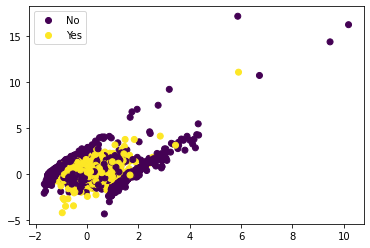

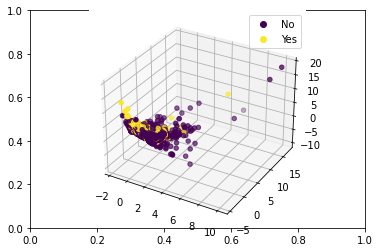

In [20]:
# YOUR CODE HERE
visualize_2pcs(X_reduced, y)
visualize_3pcs(X_reduced, y)
# YOUR CODE HERE

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [21]:
# YOUR CODE HERE (imports!)
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

def train(X, y, standardize = True) -> None:
    
    scaler = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=0
        )
    
    if standardize == True:
        my_pipeline = make_pipeline(scaler, LogisticRegression(class_weight='balanced').fit(X_train, y_train))
    else:
        my_pipeline = make_pipeline(LogisticRegression(class_weight='balanced').fit(X_train, y_train))
    #    X_train = scaler.fit(X_train)
       
        
    #elif standardize == False:
    #    X_train, X_test, y_train, y_test = train_test_split(
    #    X, y, test_size=0.20, random_state=0
    #    )
    
    #model = LogisticRegression(random_state=0, class_weight='balanced').fit(X_train, y_train)
    my_pipeline.fit(X_train, y_train)
    #results = model.predict(X_test)
    target_names = ['No', 'Yes']
    y_pred = my_pipeline.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=target_names))
        
    # YOUR CODE HERE

Now apply the pipeline on the all the features `X` and review the performance

In [22]:
train(X, y, True)

              precision    recall  f1-score   support

          No       0.75      0.77      0.76       649
         Yes       0.55      0.52      0.54       351

    accuracy                           0.68      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.68      0.68      0.68      1000



In [23]:
train(X_reduced, y, True)

              precision    recall  f1-score   support

          No       0.74      0.71      0.72       649
         Yes       0.50      0.54      0.52       351

    accuracy                           0.65      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.65      0.65      0.65      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

In [24]:
# YOUR CODE HERE
train(X_reduced, y, True)

              precision    recall  f1-score   support

          No       0.74      0.71      0.72       649
         Yes       0.50      0.54      0.52       351

    accuracy                           0.65      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.65      0.65      0.65      1000



8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    *YOUR ANSWER HERE*

ANSWER: Using fewer features helps with mitigating overfitting and reduces the computational complexity of the model for PCA. The X_reduced gives us similar performance to the X dataset at a reduced computational complexity and computational cost. 

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [25]:
# YOUR CODE HERE
from sklearn.cluster import KMeans

#my_cluster = KMeans(n_clusters=5)
#my_cluster.fit(X_reduced)

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [26]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        # YOUR CODE HERE
        # YOUR CODE HERE
        my_cluster = KMeans(n_clusters=k, random_state=10).fit(X)
        #my_cluster.fit(X)
        inertias.append(my_cluster.inertia_)
        
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

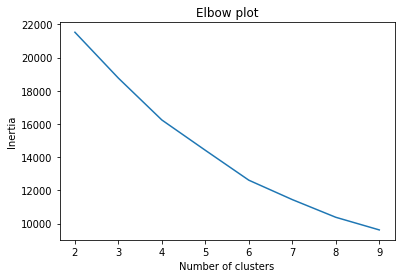

In [27]:
visualize_elbow(X_reduced, ks = [i for i in range(2, 10)])

In [28]:
# YOUR CODE HERE

4. What are the disadvantage to use the Elbow method? 

 ANSWER: It is not always the best indicator to show the "elbows" or the inflection points. The inertia will decrease as the number of clusters are increased without a visually significant elbow.

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [29]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.19982035474533988
For n_clusters = 3 The average silhouette_score is : 0.21070510180905375
For n_clusters = 4 The average silhouette_score is : 0.21930971260771875
For n_clusters = 5 The average silhouette_score is : 0.20854733899183847
For n_clusters = 6 The average silhouette_score is : 0.21130471586817226
For n_clusters = 7 The average silhouette_score is : 0.21620634090787916
For n_clusters = 8 The average silhouette_score is : 0.22096704931727096


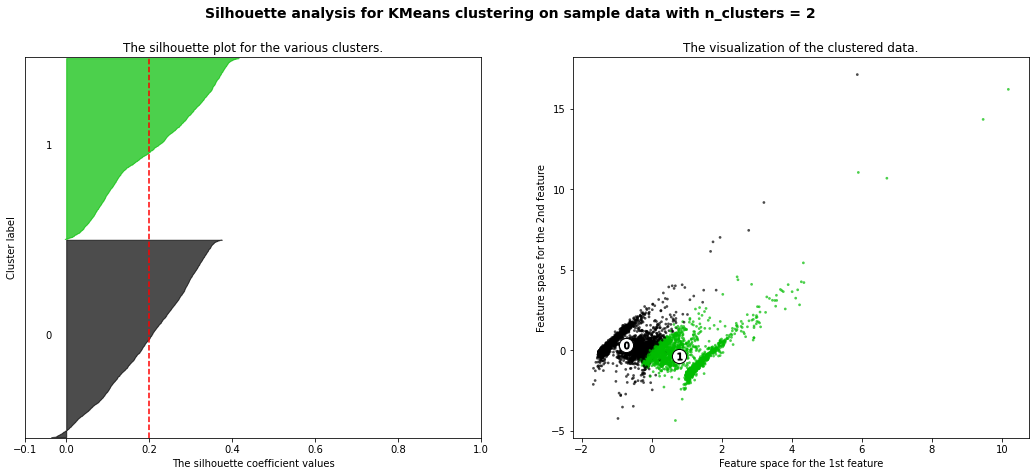

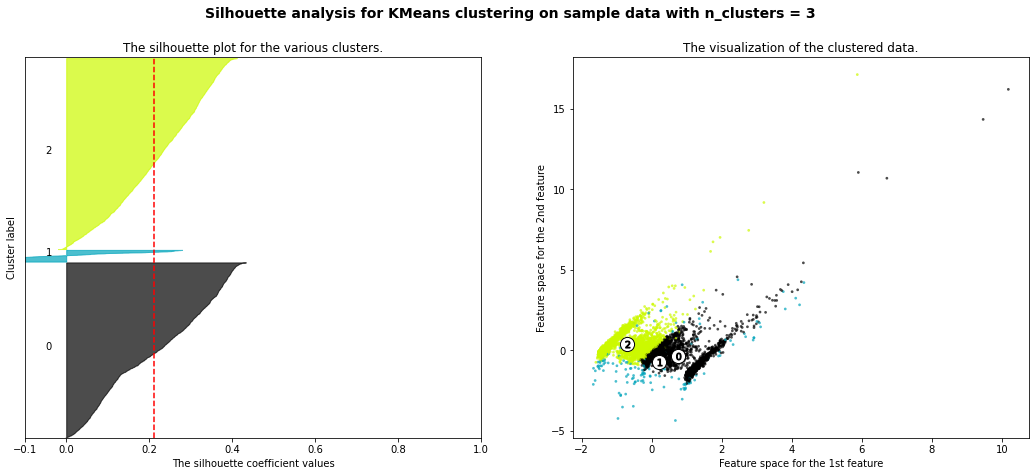

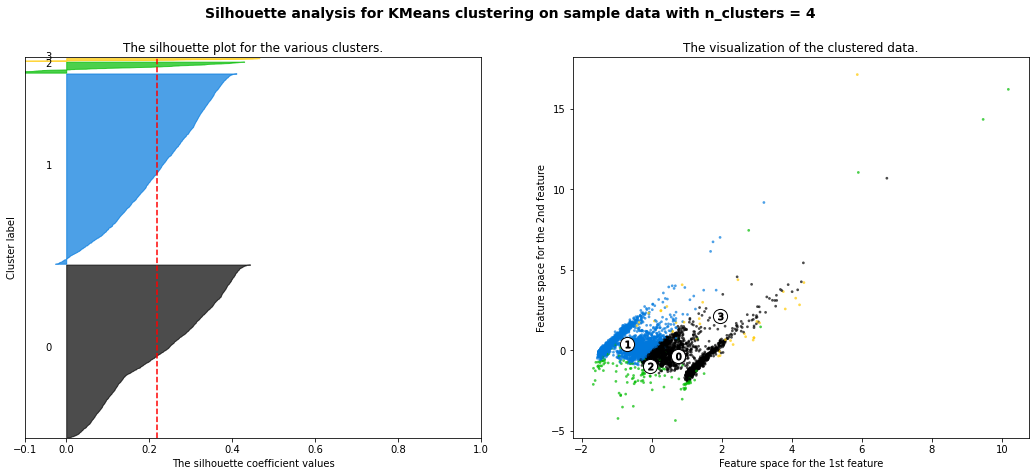

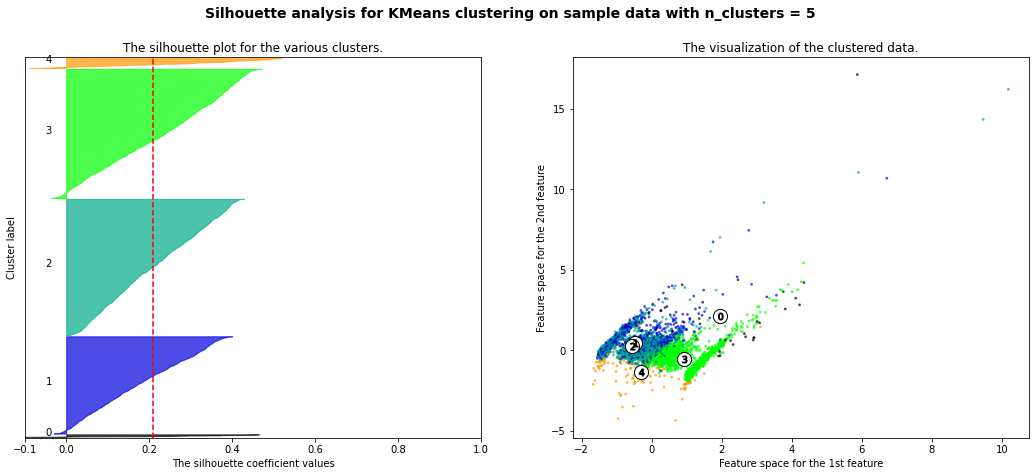

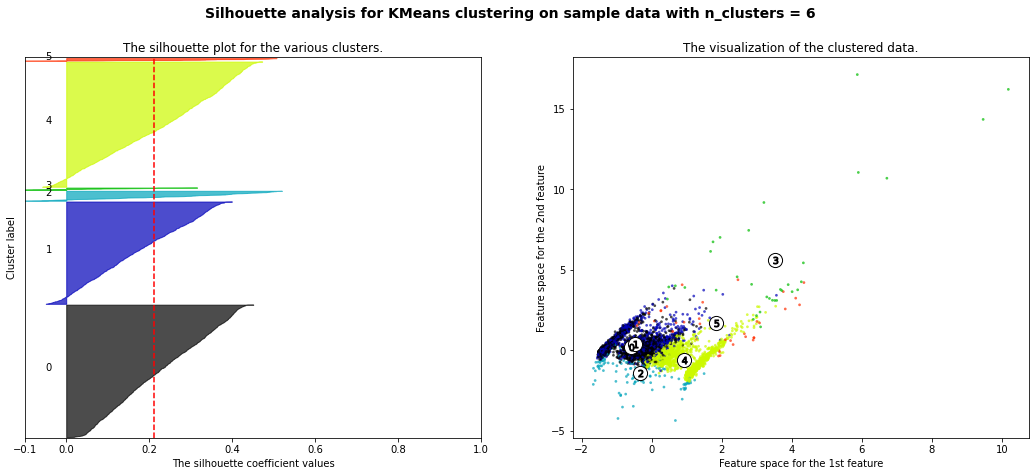

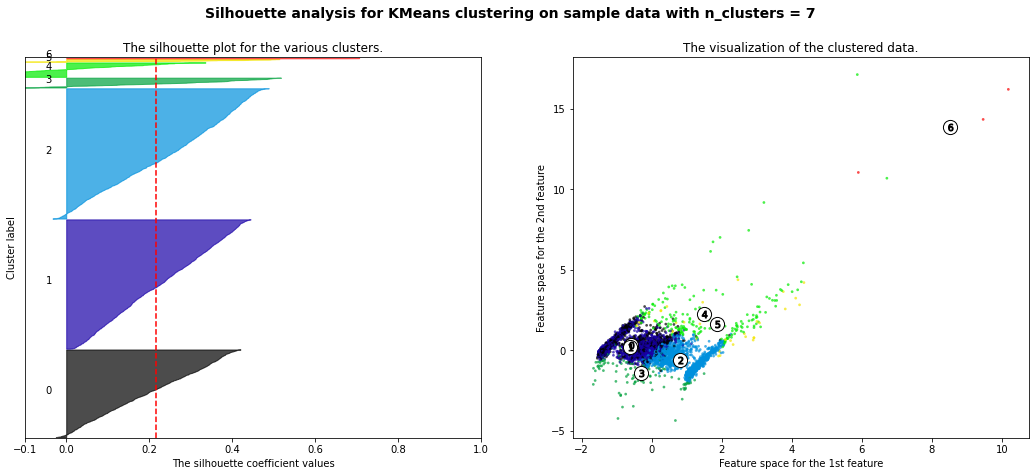

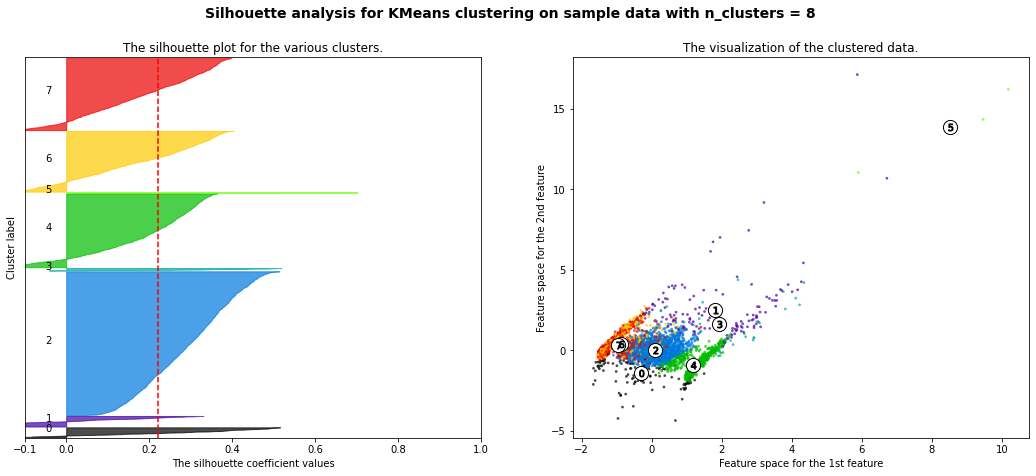

In [30]:
visualize_silhouette(8, X_reduced, 10)

6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [39]:
# YOUR CODE HERE
km = 5
kmeans = KMeans(n_clusters=km, random_state=10)
kmeans.fit(X_reduced)

KMeans(n_clusters=5, random_state=10)

7. What is the size of each cluster? 

In [41]:
# YOUR CODE HERE
labels = kmeans.labels_
labels_count = [0]*5
for x in labels:
    labels_count[x] += 1
for x in range(len(labels_count)):
    print(f"Cluster: {x}, Count: {labels_count[x]}")

Cluster: 0, Count: 37
Cluster: 1, Count: 1294
Cluster: 2, Count: 1817
Cluster: 3, Count: 1719
Cluster: 4, Count: 133


8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [42]:
# YOUR CODE HERE
past['cluster_pca'] = labels
past.head()

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,cluster_pca
0,5866936,5.618978e+08,1.333333,1.333333,5550.000,15.84000,15.84000,0.00,1.333333,0.00,...,0.000,0.0,0.666667,0.333333,0.00,0.00,0,0.00,1.0,3
1,5647110,5.326529e+08,2.250000,1.500000,27556.500,5.80000,5.56500,1.25,0.250000,0.25,...,0.750,0.0,0.000000,0.250000,0.00,0.00,0,0.00,1.0,1
2,5790472,4.578109e+08,1.000000,1.000000,0.000,6.27250,6.27250,0.25,0.750000,0.00,...,0.000,0.0,0.000000,0.750000,0.25,0.00,0,0.00,1.0,2
3,5811598,4.612641e+08,1.500000,1.500000,131532.500,5.56000,5.56000,0.25,1.000000,0.25,...,0.000,0.0,0.000000,0.500000,0.00,0.25,0,0.25,1.0,2
4,5846363,5.157993e+08,1.875000,1.375000,11055.875,4.08625,4.08625,0.50,1.000000,0.25,...,0.375,0.0,0.125000,0.250000,0.25,0.00,1,0.00,1.0,2


9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

    *YOUR ANSWER HERE*

In [43]:
# YOUR CODE HERE
tmp = past.groupby('cluster_pca').describe().T
tmp.head(16)

cluster_pca                  0             1             2             3  \
product_id count  3.700000e+01  1.294000e+03  1.817000e+03  1.719000e+03   
           mean   5.857353e+06  5.544449e+06  5.544468e+06  5.630475e+06   
           std    6.673337e+04  1.198344e+06  1.217747e+06  1.051688e+06   
           min    5.711723e+06  4.184000e+03  4.104000e+03  4.185000e+03   
           25%    5.825438e+06  5.746399e+06  5.756576e+06  5.771450e+06   
           50%    5.884465e+06  5.817160e+06  5.827474e+06  5.844144e+06   
           75%    5.904710e+06  5.858241e+06  5.867979e+06  5.890902e+06   
           max    5.931329e+06  5.915186e+06  5.916644e+06  5.932538e+06   
user_id    count  3.700000e+01  1.294000e+03  1.817000e+03  1.719000e+03   
           mean   4.965749e+08  5.149118e+08  5.178759e+08  5.355135e+08   
           std    9.046696e+07  5.538490e+07  5.780479e+07  6.357156e+07   
           min    1.319941e+08  6.524181e+07  9.113686e+07  1.219156e+08   
           25%    4.624029e+08  4.934191e+08  4.956729e+08  5.099322e+08   
           50%    4.975934e+08  5.270601e+08  5.297261e+08  5.443394e+08   
           75%    5.682334e+08  5.543148e+08  5.574755e+08  5.771885e+08   
           max    6.099770e+08  5.990725e+08  6.010278e+08  6.220262e+08   

cluster_pca                  4  
product_id count  1.330000e+02  
           mean   5.445958e+06  
           std    1.468260e+06  
           min    5.379000e+03  
           25%    5.784127e+06  
           50%    5.862712e+06  
           75%    5.891485e+06  
           max    5.931773e+06  
user_id    count  1.330000e+02  
           mean   5.371864e+08  
           std    4.471946e+07  
           min    3.924473e+08  
           25%    5.174760e+08  
           50%    5.465277e+08  
           75%    5.660707e+08  
           max    6.151285e+08

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

ANSWER: 
<br>
The basic assumptions of k-means are:
you need to choose the number of clusters arbitrarily
every data point belongs to strictly one cluster.
<br>
<br>
Kmeans a popular algorithm. It is fast, simple to understand, and requires little knowledge about the dataset.
If I want to do clustering, not very familiar with my data, K-means is probably my first choice.
<br>
<br>
As far as Kmeans being a good approach, the answer is "it depends." There are quite a few negatives to using Kmeans, but if you are unfamiliar with the dataset then Kmeans is a great way to explore and group the data. 
<br> (1) You have to choose the number of clusters. Clustering algorithm requires you to define something, but it may be cumbersome.
<br> (2) It is not deterministic. One can solve this problem partly, by running the algorithm many times and using methods of selecting starting points (like K-means++), but when it comes to really large datasets, this is a drawback.
<br> (3) It is prone to outliers. They can change the clustering results heavily.
<br> (4) It cannot detect outliers. By definition, all the points are members of a cluster.
<br> (5) It doesn't work well with some type of datasets. If the clusters are not linearly separable, k-means behaves poorly.

In [44]:
# YOUR CODE HERE
tmp.loc[['minPrice', 'maxPrice'], :]

cluster_pca             0            1            2            3           4
minPrice count  37.000000  1294.000000  1817.000000  1719.000000  133.000000
         mean    4.364459     5.245798     5.868028     6.582722   61.685342
         std     4.091700     5.012845     5.284443     6.248188   33.768153
         min     0.000000     0.000000     0.000000     0.000000   32.300000
         25%     1.430000     2.334875     2.380000     2.620000   39.935000
         50%     3.756667     3.970000     4.440000     4.750000   49.605000
         75%     6.380000     6.030000     7.295714     7.940000   67.460000
         max    17.460000    31.730000    35.080000    39.520000  236.510000
maxPrice count  37.000000  1294.000000  1817.000000  1719.000000  133.000000
         mean    4.789414     5.264288     5.895423     6.617674   61.737148
         std     3.872665     5.016022     5.293442     6.263206   33.774171
         min     0.000000     0.000000     0.000000     0.000000   32.300000
         25%     1.590000     2.352750     2.410000     2.620000   40.138000
         50%     4.020000     3.970000     4.480000     4.760000   49.918372
         75%     6.380000     6.078000     7.325000     7.940000   67.460000
         max    17.460000    31.730000    35.080000    39.520000  236.510000

11. Jot down recommendations or followup steps, detailing the reasons.

In [45]:
tmp.loc['Purchased?', :]

cluster_pca,0,1,2,3,4
count,37.000000,1294.000000,1817.000000,1719.000000,133.000000
mean,0.054054,0.321484,0.391304,0.311809,0.406015
std,0.229243,0.467227,0.488177,0.463367,0.492944
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


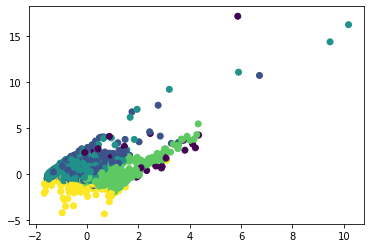

In [46]:
f = plt.figure()
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=past.cluster_pca);

In [47]:
pd.DataFrame(X_reduced).describe()

,0,1,2,3,4
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.842171e-18,-1.847411e-17,3.268497e-17,-6.394885e-18,-5.258016e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.665573e+00,-4.368984e+00,-9.810365e+00,-1.086986e+01,-7.836468e+00
25%,-7.591453e-01,-5.077522e-01,-4.230534e-01,-4.069996e-01,-4.998566e-01
50%,-6.035527e-02,-3.582646e-02,-1.434668e-01,-1.656955e-01,3.049756e-03
75%,6.532939e-01,4.100833e-01,2.005097e-01,1.443569e-01,5.055125e-01
max,1.018580e+01,1.714785e+01,1.890488e+01,1.914512e+01,1.440484e+01


In [48]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples = 15)
dbclusters = dbscan.fit_predict(X_reduced)

past['dbclusters'] = dbclusters
past.groupby('dbclusters').describe().T.loc['Purchased?', :]

dbclusters,-1,0
count,1256.000000,3744.000000
mean,0.220541,0.385150
std,0.414777,0.486696
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


*YOUR ANSWER HERE*

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [50]:
# YOUR CODE HERE
new = pd.read_csv('../dat/new.csv.gz')
print (new.shape)
print (new.columns)
new.head()

(30091, 5)
Index(['product_id', 'maxPrice', 'minPrice', 'Purchased?', 'Category'], dtype='object')


,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


In [51]:
assert new.shape == (30091, 5)

In [52]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

In [53]:
len(new.Category.unique())

724

ANSWER: The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.

    *The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.*

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [54]:
# YOUR CODE HERE
np.intersect1d(past.product_id, new.product_id)

array([], dtype=int64)

4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [55]:
# YOUR CODE HERE # ~.344
new['Purchased?'].mean()

0.3442557575354757

5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [57]:
# YOUR CODE HERE
train_cols = ['maxPrice', 'minPrice', 'Category']
label_col = 'Purchased?'

X_train = past[train_cols].to_numpy()
X_test = new[train_cols].to_numpy()
y_train = past[label_col].to_numpy()
y_test = new[label_col].to_numpy()

print ('X train shape:', X_train.shape)
print ('X test shape:', X_test.shape)
print ('y train shape:', y_train.shape)
print ('y test shape:', y_test.shape)

X train shape: (5000, 3)
X test shape: (30091, 3)
y train shape: (5000,)
y test shape: (30091,)


In [58]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [59]:
# YOUR CODE HERE

X_train = past[train_cols]
X_test = new[train_cols]
y_train = past[label_col]
y_test = new[label_col]

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ['maxPrice', 'minPrice', 'Category']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
    ]
)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_model = LogisticRegression(class_weight = 'balanced', max_iter=500)
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", lr_model)]
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [63]:
# YOUR CODE HERE
X = pd.concat([X_train, X_test], ignore_index=True)

In [64]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [65]:
# YOUR CODE HERE
y = np.array(list(y_train) + [-1] * (len(X) - len(y_train)))

In [66]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [67]:
# YOUR CODE HERE
from sklearn.semi_supervised import LabelSpreading
ls_model = LabelSpreading(kernel='knn', alpha=0.01)

model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", ls_model)]
)

model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['maxPrice', 'minPrice',
                                                   'Category'])])),
                ('model', LabelSpreading(alpha=0.01, kernel='knn'))])

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [68]:
semi_sup_preds = ls_model.transduction_
print('Verify check -> Okay:',
      (y[:len(X_train)] == semi_sup_preds[:len(X_train)]).all())
semi_sup_preds = semi_sup_preds[len(X_train):]

Verify check -> Okay: True


In [69]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [70]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     19732
           1       0.83      0.68      0.75     10359

    accuracy                           0.84     30091
   macro avg       0.84      0.80      0.82     30091
weighted avg       0.84      0.84      0.84     30091



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



ANSWER: There is quite a bit of room for improvement. The precision is relatively low and it the recall and F1 scores. Since we are launching a new product, the assumption is that we are using the model to help launch the product and generate good sales volumes. Usually launching a new product costs the company quite a bit of money with marketing. In addition to that, there is the intial setup cost of getting the product into production, and having enough numbers of the product in product to meet demand. Since recell is relatively low and we want that number higher, we might need to hold off on launching the product just yet. 

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)